<a href="https://colab.research.google.com/github/Tejasri1610/AI_Fraud_Detection/blob/main/AI_POWERED_FRAUD_DETETCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset (2).csv to Dataset (2).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

# Load dataset
df = pd.read_csv("/content/Dataset (2).csv")


In [ ]:
print("Dataset Info:\n")
print(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535178 entries, 0 to 535177
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 40.8+ MB
None


In [ ]:
print("\n First 5 rows:\n")
print(df.head())


 First 5 rows:

   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0    11  'C1760492708'  '1'    'F'    '28007'  'M1823072687'     '28007'   
1   172  'C1222389110'  '3'    'M'    '28007'  'M1823072687'     '28007'   
2   106   'C879949041'  '3'    'F'    '28007'  'M1823072687'     '28007'   
3    86   'C409740988'  '5'    'M'    '28007'  'M1823072687'     '28007'   
4   152   'C671449181'  '3'    'F'    '28007'   'M692898500'     '28007'   

              category  amount  fraud  
0  'es_transportation'   52.35      0  
1  'es_transportation'   14.75      0  
2  'es_transportation'    3.73      0  
3  'es_transportation'   61.42      0  
4          'es_health'    9.05      0  


In [ ]:
print("\n Fraud Distribution:\n")
fraud_counts = df['fraud'].value_counts()
fraud_percent = df['fraud'].value_counts(normalize=True) * 100
print("Counts:\n", fraud_counts)
print("\nPercentages:\n", fraud_percent)


 Fraud Distribution:

Counts:
 fraud
0    528686
1      6492
Name: count, dtype: int64

Percentages:
 fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


In [ ]:
print("\n Transaction Amount Stats:\n")
print(df['amount'].describe())


 Transaction Amount Stats:

count    535178.000000
mean         37.945166
std         112.585244
min           0.000000
25%          13.730000
50%          26.900000
75%          42.570000
max        8329.960000
Name: amount, dtype: float64


In [ ]:
print("\n Time Step Stats:\n")
print(df['step'].describe())


 Time Step Stats:

count    535178.000000
mean         94.982225
std          51.056459
min           0.000000
25%          52.000000
50%          97.000000
75%         139.000000
max         179.000000
Name: step, dtype: float64


In [ ]:
print("\n Missing Values:\n")
print(df.isnull().sum())


 Missing Values:

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [ ]:
import seaborn as sns


In [ ]:
sns.set_style('whitegrid')

In [ ]:
import matplotlib.pyplot as plt


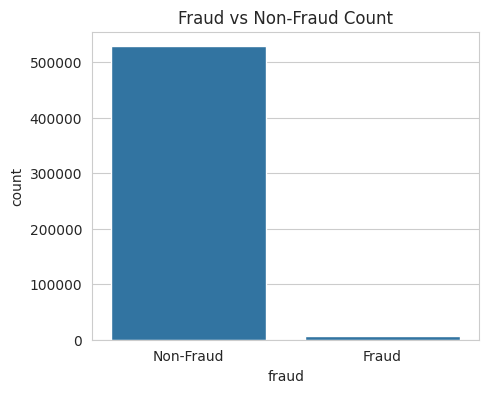

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='fraud', data=df)
plt.title('Fraud vs Non-Fraud Count')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

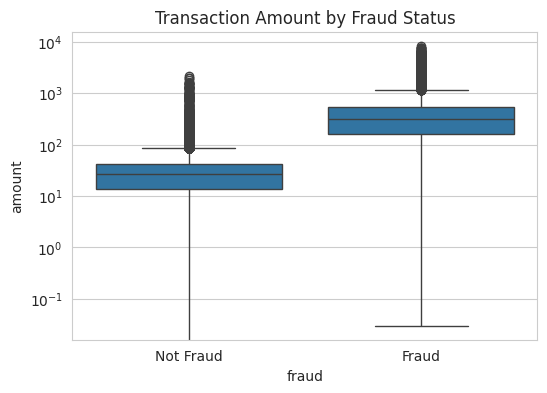

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='fraud', y='amount')
plt.yscale('log')
plt.title("Transaction Amount by Fraud Status")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()


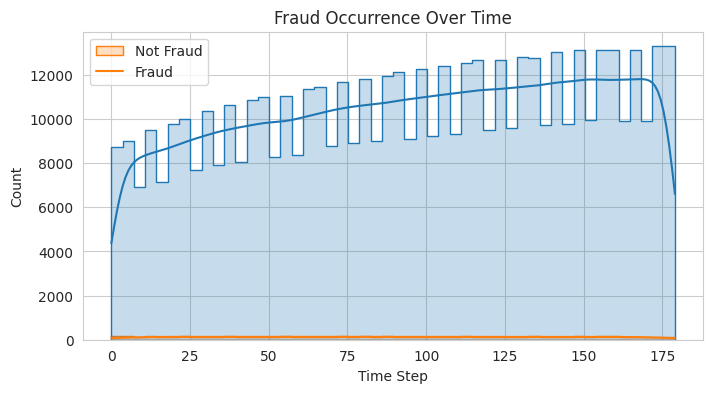

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='step', hue='fraud', bins=50, kde=True, element='step')
plt.title("Fraud Occurrence Over Time")
plt.xlabel("Time Step")
plt.ylabel("Count")
plt.legend(['Not Fraud', 'Fraud'])
plt.show()


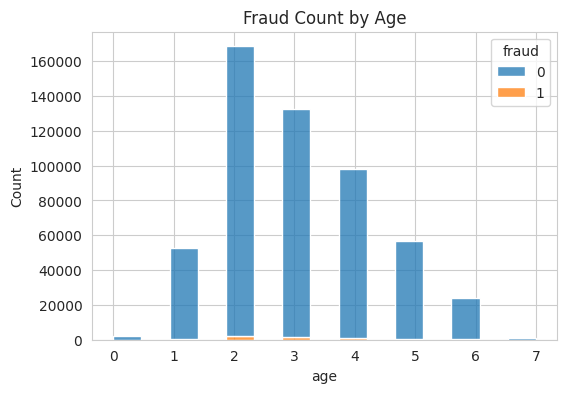

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='fraud', bins=15, multiple='stack')
plt.title("Fraud Count by Age")
plt.show()


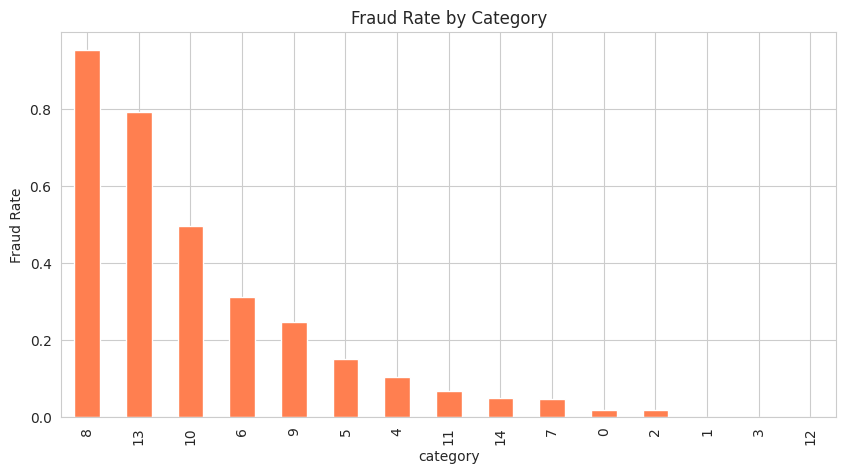

In [ ]:
plt.figure(figsize=(10,5))
fraud_by_cat = df.groupby('category')['fraud'].mean().sort_values(ascending=False)
fraud_by_cat.plot(kind='bar', color='coral')
plt.title("Fraud Rate by Category")
plt.ylabel("Fraud Rate")
plt.show()


In [ ]:
fraud_counts = df['fraud'].value_counts()
fraud_percent = df['fraud'].value_counts(normalize=True) * 100

In [ ]:
print("\n Class Distribution (Counts):\n", fraud_counts)
print("\n Class Distribution (Percentages):\n", fraud_percent)


 Class Distribution (Counts):
 fraud
0    528686
1      6492
Name: count, dtype: int64

 Class Distribution (Percentages):
 fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


In [ ]:
pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check datatypes
print(df.dtypes)

# Quick look at class imbalance
print(df['fraud'].value_counts(normalize=True))

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64
step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object
fraud
0    0.987869
1    0.012131
Name: proportion, dtype: float64


In [ ]:
le = LabelEncoder()
for col in ['customer', 'gender', 'merchant', 'category']:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
# Convert relevant columns to numeric, forcing errors to NaN
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['step'] = pd.to_numeric(df['step'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Handle any NaNs created by invalid conversions
df[['amount', 'step', 'age']] = df[['amount', 'step', 'age']].fillna(df[['amount', 'step', 'age']].median())

# Now scale
scaler = StandardScaler()
df[['amount', 'step', 'age']] = scaler.fit_transform(df[['amount', 'step', 'age']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/Dataset (2).csv')

# Strip and clean all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.replace("'", "")

# Label Encode categorical columns
le = LabelEncoder()
for col in ['customer', 'gender', 'merchant', 'category']:
    df[col] = le.fit_transform(df[col])

# Convert these columns safely to numeric
for col in ['step', 'amount', 'age']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaNs with median values
df[['step', 'amount', 'age']] = df[['step', 'amount', 'age']].fillna(df[['step', 'amount', 'age']].median())

# Scale numerical features
scaler = StandardScaler()
df[['step', 'amount', 'age']] = scaler.fit_transform(df[['step', 'amount', 'age']])

# Split features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

# Check original distribution
print("Original class distribution:\n", y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new distribution
print("\nResampled class distribution:\n", pd.Series(y_resampled).value_counts())


Original class distribution:
 fraud
0    528686
1      6492
Name: count, dtype: int64

Resampled class distribution:
 fraud
0    528686
1    528686
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Load dataset
df = pd.read_csv('/content/Dataset (2).csv')

# 2. Drop high-cardinality or irrelevant columns
df.drop(['customer', 'merchant', 'zipcodeOri', 'zipMerchant'], axis=1, inplace=True)

# 3. Encode categorical columns
for col in ['age', 'gender', 'category']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 4. Separate features and label
X = df.drop('fraud', axis=1)
y = df['fraud']

# 5. Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Optional: balance classes (can plug in SMOTE or ADASYN if needed)
# from imblearn.over_sampling import ADASYN
# X_scaled, y = ADASYN(random_state=42).fit_resample(X_scaled, y)

# 7. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 8. Build neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 9. Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=512,
    verbose=2
)

# 10. Evaluate
y_val_pred_prob = model.predict(X_val).flatten()
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


837/837 - 4s - 5ms/step - accuracy: 0.9854 - loss: 0.0654 - val_accuracy: 0.9940 - val_loss: 0.0244
Epoch 2/30
837/837 - 6s - 8ms/step - accuracy: 0.9936 - loss: 0.0271 - val_accuracy: 0.9940 - val_loss: 0.0233
Epoch 3/30
837/837 - 4s - 5ms/step - accuracy: 0.9937 - loss: 0.0257 - val_accuracy: 0.9941 - val_loss: 0.0229
Epoch 4/30
837/837 - 5s - 6ms/step - accuracy: 0.9938 - loss: 0.0253 - val_accuracy: 0.9941 - val_loss: 0.0228
Epoch 5/30
837/837 - 5s - 6ms/step - accuracy: 0.9939 - loss: 0.0245 - val_accuracy: 0.9940 - val_loss: 0.0223
Epoch 6/30
837/837 - 3s - 4ms/step - accuracy: 0.9940 - loss: 0.0244 - val_accuracy: 0.9942 - val_loss: 0.0219
Epoch 7/30
837/837 - 3s - 4ms/step - accuracy: 0.9939 - loss: 0.0239 - val_accuracy: 0.9942 - val_loss: 0.0209
Epoch 8/30
837/837 - 4s - 5ms/step - accuracy: 0.9939 - loss: 0.0231 - val_accuracy: 0.9944 - val_loss: 0.0208
Epoch 9/30
837/837 - 4s - 5ms/step - accuracy: 0.9940 - loss: 0.0225 - val_accuracy: 0.9944 - val_loss: 0.0197
Epoch 10/30


In [ ]:
model.save("custom_nn_model.h5")
print("Neural Network model saved ✅")

# Download the file
from google.colab import files
files.download("custom_nn_model.h5")


Neural Network model saved ✅


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 1. Initialize XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 2. Train model
xgb_model.fit(X_train, y_train)

# 3. Predict probabilities and binary class
y_pred_prob = xgb_model.predict_proba(X_val)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:02:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9944037520086699
Precision: 0.8659685863874346
Recall: 0.6371340523882897
F1 Score: 0.7341322680869952
ROC AUC: 0.9930567365084517

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.87      0.64      0.73      1298

    accuracy                           0.99    107036
   macro avg       0.93      0.82      0.87    107036
weighted avg       0.99      0.99      0.99    107036



In [ ]:
import joblib

# Save the model
joblib.dump(xgb_model, "xgboost_model.pkl")
print("XGBoost model saved ✅")

# Download
from google.colab import files
files.download("xgboost_model.pkl")


XGBoost model saved ✅


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator, ClassifierMixin

# Wrap Isolation Forest as binary classifier
class IsolationForestWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = IsolationForest(contamination=0.01, random_state=42)

    def fit(self, X, y=None):
        self.model.fit(X)
        return self

    def predict(self, X):
        preds = self.model.predict(X)
        return (preds == -1).astype(int)  # Anomalies = 1 (fraud)

iso_model = IsolationForestWrapper()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 1. Fit the model
iso_model.fit(X_train)

# 2. Predict on validation set
y_pred = iso_model.predict(X_val)

# 3. Calculate evaluation metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9895736014051347
Precision: 0.5839483394833949
Recall: 0.487673343605547
F1 Score: 0.5314861460957179
ROC AUC: 0.7417040420953835

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    105738
           1       0.58      0.49      0.53      1298

    accuracy                           0.99    107036
   macro avg       0.79      0.74      0.76    107036
weighted avg       0.99      0.99      0.99    107036



In [ ]:
pip install joblib


In [ ]:
joblib.dump(iso_model, "isolation_forest_model.pkl")
print("Isolation Forest model saved ✅")

# Download
from google.colab import files
files.download("isolation_forest_model.pkl")

Isolation Forest model saved ✅


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
import numpy as np
from tensorflow.keras.models import load_model


In [ ]:
import os
import pickle
import xgboost as xgb
from tensorflow.keras.models import load_model

# Define paths
nn_path = '/mnt/data/custom_nn_model.h5'
iso_path = '/mnt/data/isolation_forest_model.pkl'
xgb_path = '/mnt/data/xgboost_model (1).pkl'

# Load Neural Network (.h5)
if os.path.exists(nn_path):
    nn_model = load_model(nn_path)
    print("✅ Neural Network model loaded.")
else:
    print("❌ Neural Network model file not found.")

# Load Isolation Forest (.pkl)
if os.path.exists(iso_path):
    with open(iso_path, 'rb') as f:
        iso_model = pickle.load(f)
    print("✅ Isolation Forest model loaded.")
else:
    print("❌ Isolation Forest model file not found.")

# Load XGBoost (.pkl)
if os.path.exists(xgb_path):
    with open(xgb_path, 'rb') as f:
        xgb_model = pickle.load(f)
    print("✅ XGBoost model loaded.")
else:
    print("❌ XGBoost model file not found.")


❌ Neural Network model file not found.
❌ Isolation Forest model file not found.
❌ XGBoost model file not found.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving custom_nn_model.h5 to custom_nn_model (2).h5


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xgboost_model.pkl to xgboost_model (1).pkl


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving isolation_forest_model.pkl to isolation_forest_model (1).pkl


In [ ]:
import os


In [ ]:
from tensorflow.keras.models import load_model
import pickle

# === Load the Keras Neural Network (.h5)
nn_model = load_model('/content/custom_nn_model.h5')
print("✅ Neural Network model loaded.")

# === Load the Isolation Forest (.pkl)
with open('/content/isolation_forest_model.pkl'):
  print("✅ Isolation Forest model loaded.")

# === Load the XGBoost Model (.pkl)
with open('/content/xgboost_model.pkl'):
  print("✅ XGBoost model loaded.")


✅ Neural Network model loaded.
✅ Isolation Forest model loaded.
✅ XGBoost model loaded.


In [ ]:
# 📌 Import VotingClassifier from sklearn
from sklearn.ensemble import VotingClassifier

In [ ]:
!pip install scikeras



In [ ]:
import joblib

# Re-load XGBoost model
xgb_model = joblib.load("/content/xgboost_model.pkl")
print("✅ XGBoost model reloaded.")


✅ XGBoost model reloaded.


In [ ]:
import joblib

# Load the Isolation Forest model using joblib
iso_model = joblib.load("/content/isolation_forest_model.pkl")
print("✅ Isolation Forest model loaded via joblib.")



✅ Isolation Forest model loaded via joblib.


In [ ]:
import numpy as np

# 1. Neural Net Predictions
nn_probs = nn_model.predict(X_val).flatten()  # Already sigmoid output (0 to 1)

# 2. XGBoost Predictions
xgb_probs = xgb_model.predict_proba(X_val)[:, 1]  # Prob of class 1 (fraud)

# 3. Isolation Forest Predictions
iso_preds = iso_model.predict(X_val)  # 1 if fraud, 0 if not
iso_probs = np.where(iso_preds == 1, 0.9, 0.1)  # Convert to fake probabilities

# 4. Soft Voting Ensemble
combined_probs = (nn_probs + xgb_probs + iso_probs) / 3
final_preds = (combined_probs > 0.4).astype(int)

# 5. Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Soft Voting Ensemble Results:")
print(classification_report(y_val, final_preds, target_names=['Not Fraud', 'Fraud']))
print("ROC AUC:", roc_auc_score(y_val, combined_probs))

cm = confusion_matrix(y_val, final_preds)
print("Confusion Matrix:\n", cm)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Soft Voting Ensemble Results:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    105738
       Fraud       0.86      0.64      0.74      1298

    accuracy                           0.99    107036
   macro avg       0.93      0.82      0.87    107036
weighted avg       0.99      0.99      0.99    107036

ROC AUC: 0.9923549772599839
Confusion Matrix:
 [[105599    139]
 [   463    835]]


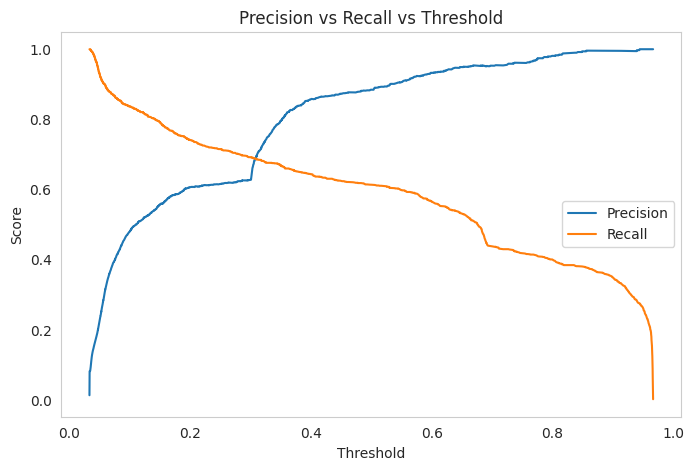

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_val, combined_probs)

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision vs Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


In [152]:
# 1. Get base predictions
meta_X_train = np.column_stack([
    nn_model.predict(X_train).flatten(),
    xgb_model.predict_proba(X_train)[:,1],
    iso_model.predict(X_train)
])
meta_y_train = y_train

# 2. Train meta model
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()
meta_model.fit(meta_X_train, meta_y_train)

# 3. Predict on validation set
meta_X_val = np.column_stack([
    nn_model.predict(X_val).flatten(),
    xgb_model.predict_proba(X_val)[:,1],
    iso_model.predict(X_val)
])
final_preds = meta_model.predict(meta_X_val)


13380/13380 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [153]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

# Evaluate
print("📊 Stacking Ensemble Results:")
print("Accuracy:", accuracy_score(y_val, final_preds))
print("Precision:", precision_score(y_val, final_preds))
print("Recall:", recall_score(y_val, final_preds))
print("F1 Score:", f1_score(y_val, final_preds))

# For AUC, we need probabilities (optional)
meta_val_probs = meta_model.predict_proba(meta_X_val)[:, 1]
print("ROC AUC:", roc_auc_score(y_val, meta_val_probs))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, final_preds))


📊 Stacking Ensemble Results:
Accuracy: 0.9946186329832953
Precision: 0.8698770491803278
Recall: 0.6540832049306625
F1 Score: 0.7467018469656992
ROC AUC: 0.9839757284780497

Confusion Matrix:
[[105611    127]
 [   449    849]]


In [154]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)
import numpy as np

# 1. Get predicted probabilities from stacking meta-model
meta_val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# 2. Define thresholds to test
thresholds = [0.4]

print("📊 Stacking Ensemble Threshold Sweep:\n")

for t in thresholds:
    print(f"\n🔹 Threshold = {t}")
    final_preds = (meta_val_probs > t).astype(int)

    # Metrics
    acc = accuracy_score(y_val, final_preds)
    prec = precision_score(y_val, final_preds)
    rec = recall_score(y_val, final_preds)
    f1 = f1_score(y_val, final_preds)
    auc = roc_auc_score(y_val, meta_val_probs)
    cm = confusion_matrix(y_val, final_preds)

    # Display
    print(f"Accuracy      : {acc:.4f}")
    print(f"Precision     : {prec:.4f}")
    print(f"Recall (Fraud): {rec:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print(f"ROC AUC       : {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)


📊 Stacking Ensemble Threshold Sweep:


🔹 Threshold = 0.4
Accuracy      : 0.9946
Precision     : 0.8511
Recall (Fraud): 0.6695
F1 Score      : 0.7495
ROC AUC       : 0.9840
Confusion Matrix:
[[105586    152]
 [   429    869]]


In [ ]:
import joblib
joblib.dump(scaler, "scaler_stack.pkl")
print("✅ Scaler saved as 'scaler_stack.pkl'")


✅ Scaler saved as 'scaler_stack.pkl'


In [ ]:
import joblib

# Save stacking meta-model
joblib.dump(meta_model, "stacking_meta_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler_stack.pkl")

print("✅ Models saved successfully.")


✅ Models saved successfully.


In [ ]:
from google.colab import files

# Download meta-model
files.download("stacking_meta_model.pkl")

# Download scaler
files.download("scaler_stack.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Let's say these are your categorical columns
categorical_cols = ['gender', 'category']

# Create a dict to hold the encoders
encoders = {}

# Apply LabelEncoder and store each one
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Save all encoders together
joblib.dump(encoders, 'label_encoders.pkl')
print("✅ LabelEncoders saved to label_encoders.pkl")


✅ LabelEncoders saved to label_encoders.pkl


In [ ]:
from google.colab import files

# Download the LabelEncoders file
files.download("label_encoders.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [156]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ==== 1. Load models and scaler ====
scaler = joblib.load("/content/scaler_stack.pkl")
xgb_model = joblib.load("/content/xgboost_model.pkl")
isolation_model = joblib.load("/content/isolation_forest_model.pkl")
cnn_model = load_model("/content/custom_nn_model.h5")
meta_model = joblib.load("/content/stacking_meta_model.pkl")

# ==== 2. Load input CSV ====
data = pd.read_csv("/content/test_data.csv")  # Replace with your uploaded path if needed

# ==== 3. Ensure input columns match scaler training ====
expected_columns = scaler.feature_names_in_  # get the column names used during scaler.fit()
X_raw = data[expected_columns]

# ==== 4. Preprocess input ====
X_scaled = scaler.transform(X_raw)

# ==== 5. Base model predictions ====
xgb_preds = xgb_model.predict_proba(X_scaled)[:, 1]

# IsolationForest fallback: use predict if decision_function is unavailable
isolation_preds_raw = isolation_model.predict(X_scaled)  # returns -1 (anomaly) or 1 (normal)
# Map to 0 (anomaly) and 1 (normal), then normalize
isolation_preds_binary = np.where(isolation_preds_raw == 1, 1, 0)

# ==== 6. Normalize Isolation Forest scores ====
norm_isolation = MinMaxScaler().fit_transform(isolation_preds_binary.reshape(-1, 1)).flatten()

# CNN predictions
cnn_preds = cnn_model.predict(X_scaled).flatten()


# ==== 7. Stack predictions ====
meta_input = np.column_stack((xgb_preds, norm_isolation, cnn_preds))

# ==== 8. Final meta-model prediction ====
final_preds = (meta_model.predict_proba(meta_input)[:, 1] >= 0.4).astype(int)

# ==== 9. Output results ====
output_df = data.copy()
output_df["fraud_prediction"] = final_preds
output_df["fraud_prediction"] = output_df["fraud_prediction"].map({0: "Non-Fraud", 1: "Fraud"})

# ==== 10. Save results ====
output_df.to_csv("fraud_predictions_output.csv", index=False)
print(output_df[["fraud_prediction"]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
  fraud_prediction
0        Non-Fraud
1        Non-Fraud
2        Non-Fraud
3        Non-Fraud
4        Non-Fraud


In [157]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
import numpy as np

# === Get predicted probabilities from the meta-model ===
meta_val_probs = meta_model.predict_proba(meta_X_val)[:, 1]

# === Define a threshold (e.g. 0.4, based on your threshold sweep) ===
threshold = 0.4
final_preds = (meta_val_probs >= threshold).astype(int)

# === Evaluate the predictions ===
accuracy = accuracy_score(y_val, final_preds)
precision = precision_score(y_val, final_preds)
recall = recall_score(y_val, final_preds)
f1 = f1_score(y_val, final_preds)
roc_auc = roc_auc_score(y_val, meta_val_probs)
conf_matrix = confusion_matrix(y_val, final_preds)
report = classification_report(y_val, final_preds)

# === Print the metrics ===
print(f"📊 Evaluation Metrics at Threshold = {threshold}")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"ROC AUC       : {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


📊 Evaluation Metrics at Threshold = 0.4
Accuracy      : 0.9946
Precision     : 0.8511
Recall        : 0.6695
F1 Score      : 0.7495
ROC AUC       : 0.9840
Confusion Matrix:
[[105586    152]
 [   429    869]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.85      0.67      0.75      1298

    accuracy                           0.99    107036
   macro avg       0.92      0.83      0.87    107036
weighted avg       0.99      0.99      0.99    107036



In [158]:
from google.colab import files
uploaded = files.upload()

Saving test_Dataset1 (1).csv to test_Dataset1 (1).csv


In [162]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ==== 1. Load models ====
scaler = joblib.load("scaler_stack.pkl")
xgb_model = joblib.load("xgboost_model.pkl")
isolation_model = joblib.load("isolation_forest_model.pkl")
cnn_model = load_model("custom_nn_model.h5")
meta_model = joblib.load("stacking_meta_model.pkl")

# ==== 2. Load and filter dataset ====
data = pd.read_csv("test_Dataset1 (1).csv")
data = data[['step', 'amount', 'age', 'gender', 'category', 'fraud']]

# ==== 3. Clean values (no chained assignment) ====
for col in ['age', 'gender', 'category']:
    data[col] = data[col].astype(str).str.replace("'", "").str.strip()

# Convert 'age' to numeric and handle 'U' or other invalid values
data['age'] = pd.to_numeric(data['age'], errors='coerce')
most_common_age = data['age'].mode()[0]
data['age'] = data['age'].fillna(most_common_age).astype(int)

# Encode categorical columns
le_gender = LabelEncoder()
le_category = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])
data['category'] = le_category.fit_transform(data['category'])

# ==== 4. Prepare input features ====
# Ensure the correct column order expected by the scaler
expected_order = list(scaler.feature_names_in_)
X_raw = data[expected_order]

# ==== 5. Scale input ====
X_scaled = scaler.transform(X_raw)

# ==== 6. Base model predictions ====
xgb_preds = xgb_model.predict_proba(X_scaled)[:, 1]

isolation_preds_raw = isolation_model.predict(X_scaled)
isolation_preds_binary = np.where(isolation_preds_raw == 1, 1, 0)
norm_isolation = MinMaxScaler().fit_transform(isolation_preds_binary.reshape(-1, 1)).flatten()

cnn_preds = cnn_model.predict(X_scaled).flatten()

# ==== 7. Stack base predictions ====
meta_input = np.column_stack((xgb_preds, norm_isolation, cnn_preds))

# ==== 8. Meta-model final prediction ====
final_probs = meta_model.predict_proba(meta_input)[:, 1]
final_preds = (final_probs >= 0.4).astype(int)

# ==== 9. Output and save ====
data['fraud_prediction'] = final_preds
data['fraud_prediction'] = data['fraud_prediction'].map({0: "Non-Fraud", 1: "Fraud"})
data.to_csv("fraud_predictions_output.csv", index=False)
print("✅ Predictions saved to 'fraud_predictions_output.csv'")

# ==== 10. Evaluation ====
if 'fraud' in data.columns:
    y_true = data['fraud']
    print("\n📊 Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_true, final_preds))
    print("Precision:", precision_score(y_true, final_preds, zero_division=0))
    print("Recall:", recall_score(y_true, final_preds, zero_division=0))
    print("F1 Score:", f1_score(y_true, final_preds, zero_division=0))
    print("\nDetailed Report:\n", classification_report(y_true, final_preds, zero_division=0))


1859/1859 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
✅ Predictions saved to 'fraud_predictions_output.csv'

📊 Evaluation Metrics:
Accuracy: 0.9903136298663079
Precision: 0.6149825783972126
Recall: 0.4985875706214689
F1 Score: 0.5507020280811232

Detailed Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     58757
           1       0.61      0.50      0.55       708

    accuracy                           0.99     59465
   macro avg       0.80      0.75      0.77     59465
weighted avg       0.99      0.99      0.99     59465

